In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import torch

# Лабораторная работа №4

# 1. Загрузка данных датасета в переменную

In [2]:
data = pd.read_csv('JobSurveyIndia.csv')
data.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             400 non-null    int64  
 1   Employment Sector      400 non-null    object 
 2   Employment Background  400 non-null    object 
 3   Public Dealing         400 non-null    object 
 4   Degree                 400 non-null    object 
 5   IdealNumberOfWorkdays  400 non-null    float64
 6   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

# 2. Задача классификации

# 3. Предобработка данных

Ниже будут объеденены пункты B и D в функции для выполнения кодирования категориальных переменных, а так же заполнения пустых значений.

### B. Проверка и заполнение пропусков. D. Кодирование категориальных переменных

In [5]:
data.isnull().sum()

Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

В нашем случае пропусков не обнаружено

In [6]:
# Создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()

# Кодируем переменные типа object
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

print(data)

     Employment Sector  Employment Background  Public Dealing  Degree  \
0                    2                      3               0       1   
1                    2                      1               1       2   
2                    1                      3               0       1   
3                    1                      2               2       2   
4                    2                      3               0       1   
..                 ...                    ...             ...     ...   
395                  2                      2               1       2   
396                  1                      2               2       0   
397                  1                      2               2       0   
398                  1                      2               0       0   
399                  0                      2               2       0   

     IdealNumberOfWorkdays  IdealYearlyIncome  
0                      4.0                  3  
1                      4.0 

In [7]:
data['IdealNumberOfWorkdays'] = data['IdealNumberOfWorkdays'].astype('int32')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Employment Sector      400 non-null    int32
 1   Employment Background  400 non-null    int32
 2   Public Dealing         400 non-null    int32
 3   Degree                 400 non-null    int32
 4   IdealNumberOfWorkdays  400 non-null    int32
 5   IdealYearlyIncome      400 non-null    int32
dtypes: int32(6)
memory usage: 9.5 KB


In [9]:
data.head()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,2,3,0,1,4,3
1,2,1,1,2,4,1
2,1,3,0,1,6,2
3,1,2,2,2,4,2
4,2,3,0,1,5,0


### C. Нормирование численных переменных датасета

In [10]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = [ 'IdealNumberOfWorkdays']

trans = MinMaxScaler()

data[numeric_columns] = trans.fit_transform(data[numeric_columns])

data[numeric_columns] = pd.DataFrame(data[numeric_columns])

data[numeric_columns].head()


,IdealNumberOfWorkdays
0,0.000000
1,0.000000
2,0.666667
3,0.000000
4,0.333333


### A. Разделение выборки на тестовую и тренировочную

In [11]:
data.describe()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,1.147500,2.010000,1.100000,0.85250,0.300833,1.505000
std,0.712047,0.906617,0.931219,0.79203,0.268663,1.057246
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.00000,0.333333,2.000000
75%,2.000000,3.000000,2.000000,1.25000,0.333333,2.000000
max,2.000000,3.000000,2.000000,2.00000,1.000000,3.000000


In [12]:
X = data.drop(columns=['IdealYearlyIncome'])
y = data['IdealYearlyIncome']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=17)

# 4. Dataset и Dataloader

In [14]:
from torch.utils.data import Dataset, DataLoader

In [15]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [16]:
# Создание объектов Dataset
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

# Создание объектов DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 5. Обучение модели на тренировочном множестве

In [17]:
import torch.nn as nn
import torch.optim as optim

In [18]:
# Функция потерь
criterion = nn.CrossEntropyLoss()

# Количество эпох
epochs = 100

### А.Простая модель с оптимизатором

In [19]:
# Определение модели
model1 = nn.Linear(X_train.shape[1], 4)

# Определение оптимизатора
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)

### B. Модель с 1 внешним слоем

In [20]:
# Определение модели
model2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 4)
)

# Определение оптимизатора
optimizer2 = optim.Adam(model2.parameters(), lr=0.05)

### C. Модель с 3+ слоями

In [21]:
# Определение модели
model3 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 4),
)

# Определение оптимизатора
optimizer3 = optim.Adam(model3.parameters(), lr=0.01)

# 6. Подсчет loss на train и test выборках и графики

In [22]:
# Инициализация списков для сохранения потерь
train_losses1, test_losses1 = [], []
train_losses2, test_losses2 = [], []
train_losses3, test_losses3 = [], []


In [23]:
# Функция для расчета потерь
def calculate_loss(model, loader):
    total_loss = 0
    for inputs, targets in loader:
        outputs = model(inputs.float())
        loss = criterion(outputs, targets.long())
        total_loss += loss.item()
    return total_loss / len(loader)

In [24]:
# Расчет потерь для каждой эпохи
for epoch in range(epochs):
    for model, optimizer, train_losses, test_losses in [(model1, optimizer1, train_losses1, test_losses1), 
                                                        (model2, optimizer2, train_losses2, test_losses2), 
                                                        (model3, optimizer3, train_losses3, test_losses3)]:
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.float())
            loss = criterion(outputs, targets.long())
            loss.backward()
            optimizer.step()

        train_loss = calculate_loss(model, train_loader)
        test_loss = calculate_loss(model, test_loader)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

1.5056041479110718
1.4461631417274474
1.4070570945739747
1.3808422684669495
1.361770796775818
1.3472341537475585
1.3355502367019654
1.3260610938072204
1.3178489446640014
1.3106008172035217
1.3040955781936645
1.2982358932495117
1.2927969932556151
1.2877602934837342
1.2830070018768311
1.2785406470298768
1.274246346950531
1.2701617360115052
1.266260302066803
1.2624739766120912
1.2587916135787964
1.2552350640296936
1.2517927527427672
1.2484452247619628
1.2451889753341674
1.2420175433158875
1.238924491405487
1.2359072804450988
1.2329726099967957
1.2300951600074768
1.227287220954895
1.224546205997467
1.2218607425689698
1.2192347407341004
1.216659164428711
1.214143419265747
1.2116758346557617
1.2092576622962952
1.206889307498932
1.2045642614364624
1.202285635471344
1.2000501155853271
1.1978519082069397
1.1957009553909301
1.193583858013153
1.191496527194977
1.1894473791122437
1.1874361634254456
1.1854570746421813
1.1835067868232727
1.1815897583961488
1.179704475402832
1.1778480291366578
1.1760

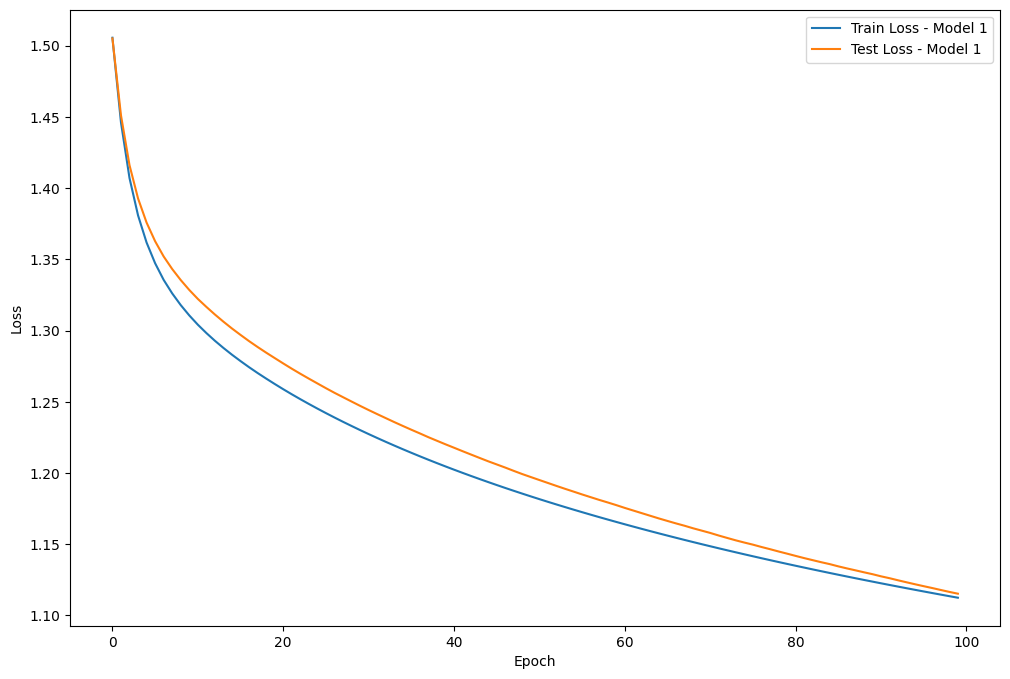

In [25]:
for item in train_losses1:
    print(item, end='\n')

# Визуализация потерь
plt.figure(figsize=(12, 8))
plt.plot(train_losses1, label='Train Loss - Model 1')
plt.plot(test_losses1, label='Test Loss - Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

0.9744965851306915
0.8174735844135285
0.6482936561107635
0.5652615040540695
0.5070518553256989
0.5278468817472458
0.5090548068284988
0.4218990385532379
0.4348800241947174
0.4209585338830948
0.41472242027521133
0.44128806293010714
0.4450777888298035
0.38787795007228854
0.3676666855812073
0.3662600487470627
0.36516678631305693
0.39534527659416197
0.3437580898404121
0.35090771317481995
0.35617375671863555
0.3476931259036064
0.37870059013366697
0.33383380621671677
0.3664985209703445
0.3350928068161011
0.3397133842110634
0.32919159084558486
0.35900152176618577
0.34197197705507276
0.3547432363033295
0.3458681896328926
0.3406949996948242
0.33608428239822385
0.39003268629312515
0.46269766986370087
0.35968013256788256
0.3386377066373825
0.33119933009147645
0.3432422250509262
0.34944728910923006
0.3295315086841583
0.32431175336241724
0.3309959650039673
0.34541926383972166
0.3384484812617302
0.3540936172008514
0.3345530733466148
0.3442637979984283
0.34847157895565034
0.3205309435725212
0.34300743

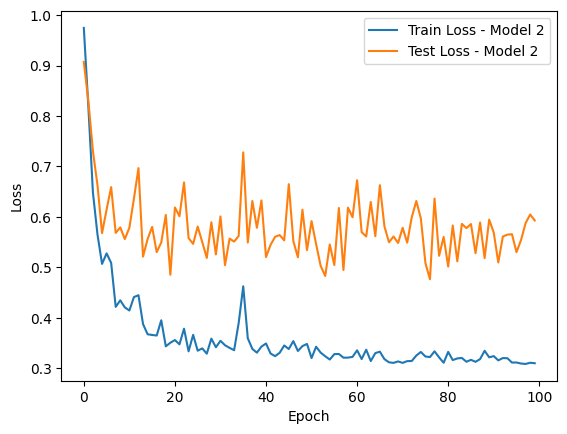

In [26]:
for item in train_losses2:
    print(item, end='\n')

plt.plot(train_losses2, label='Train Loss - Model 2')
plt.plot(test_losses2, label='Test Loss - Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1.0984915971755982
0.8479798257350921
0.7516591250896454
0.7195001661777496
0.603353014588356
0.5172626674175262
0.4374168574810028
0.5624022156000137
0.4225022614002228
0.3964458078145981
0.3560490906238556
0.356423544883728
0.3645076185464859
0.347314777970314
0.34553696066141126
0.3306416630744934
0.3425693452358246
0.3387930303812027
0.34587832242250444
0.3497250184416771
0.3535421296954155
0.3163584530353546
0.3591846078634262
0.37167830765247345
0.3701519638299942
0.36330311596393583
0.33489779084920884
0.3374931111931801
0.33390484005212784
0.3321234524250031
0.3191863000392914
0.31817476749420165
0.3124605089426041
0.3202464759349823
0.3186361774802208
0.3230348229408264
0.3231371447443962
0.3198435127735138
0.3125954672694206
0.31092118173837663
0.3115711614489555
0.3180735781788826
0.34768393337726594
0.37909273952245715
0.3460236057639122
0.33551464825868604
0.33322056084871293
0.3313081175088882
0.31548921167850497
0.3163856342434883
0.3152505248785019
0.3131086200475693
0.

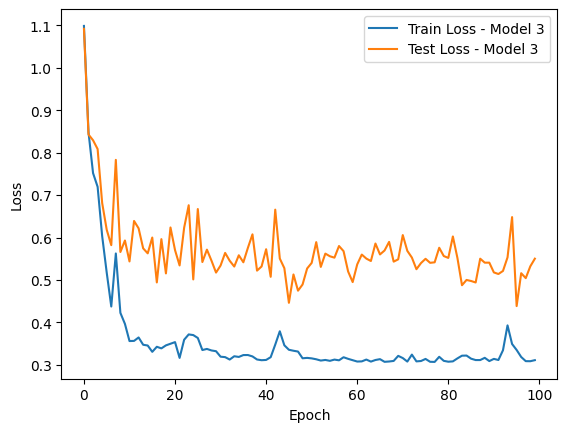

In [27]:
for item in train_losses3:
    print(item, end='\n')

plt.plot(train_losses3, label='Train Loss - Model 3')
plt.plot(test_losses3, label='Test Loss - Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 7. Подсчет метрик на train и test множествах для регресии(Accuracy)

In [28]:
# Функция для расчета Accuracy
def calculate_accuracy(model, loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs.float())
            _, predicted = torch.max(outputs.data, 1)  # Изменение здесь
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    return correct / total

# Расчет Accuracy для каждой модели на train и test множествах
for model, name in [(model1, 'Model 1'), (model2, 'Model 2'), (model3, 'Model 3')]:
    train_accuracy = calculate_accuracy(model, train_loader)
    test_accuracy = calculate_accuracy(model, test_loader)
    print(f'{name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


Model 1 - Train Accuracy: 0.6031, Test Accuracy: 0.5250
Model 2 - Train Accuracy: 0.8438, Test Accuracy: 0.7500
Model 3 - Train Accuracy: 0.8406, Test Accuracy: 0.7500


# 8. Сравненеи метрик и выводы

In [29]:
# Функция для отображения метрик
def display_metrics(train_metrics, test_metrics, model_names, metric_name):
    print(f'{metric_name} Сравнение:')
    for train_metric, test_metric, model_name in zip(train_metrics, test_metrics, model_names):
        print(f'{model_name} - Train {metric_name}: {train_metric:.4f}, Test {metric_name}: {test_metric:.4f}')

# Расчет метрик Accuracy для каждой модели на train и test множествах
train_accuracies = []
test_accuracies = []

for model in [model1, model2, model3]:
    train_accuracy = calculate_accuracy(model, train_loader)
    test_accuracy = calculate_accuracy(model, test_loader)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Отображение метрик Accuracy
display_metrics(train_accuracies, test_accuracies, ['Model 1', 'Model 2', 'Model 3'], 'Accuracy')

# Ответы на вопросы
print("\nОтветы на вопросы:")
best_model_index = test_accuracies.index(max(test_accuracies))
print(f"1. Лучшая модель: {['Model 1', 'Model 2', 'Model 3'][best_model_index]}")
print("2. Переобучение определяется разницей между метриками на train и test.")
for i, model_name in enumerate(['Model 1', 'Model 2', 'Model 3']):
    if train_accuracies[i] > test_accuracies[i]:
        print(f"{model_name} - Есть признаки переобучения.")
    else:
        print(f"{model_name} - Переобучения нет.")
print("3. Недообучение можно определить, если метрика на train и test низкая.")
for i, model_name in enumerate(['Model 1', 'Model 2', 'Model 3']):
    if train_accuracies[i] < 0.7 or test_accuracies[i] < 0.7:
        print(f"{model_name} - Есть признаки недообучения.")
    else:
        print(f"{model_name} - Недообучения нет.")
print("4. Для улучшения метрик моделей можно использовать следующие методы:")
print("- Использование более сложных моделей или увеличение количества слоев и нейронов в сети.")
print("- Использование других оптимизаторов или изменение параметров текущих оптимизаторов.")
print("- Регуляризация моделей для снижения переобучения.")
print("- Использование методов аугментации данных для увеличения разнообразия тренировочного набора данных.")


Accuracy Сравнение:
Model 1 - Train Accuracy: 0.6031, Test Accuracy: 0.5250
Model 2 - Train Accuracy: 0.8438, Test Accuracy: 0.7500
Model 3 - Train Accuracy: 0.8406, Test Accuracy: 0.7500

Ответы на вопросы:
1. Лучшая модель: Model 2
2. Переобучение определяется разницей между метриками на train и test.
Model 1 - Есть признаки переобучения.
Model 2 - Есть признаки переобучения.
Model 3 - Есть признаки переобучения.
3. Недообучение можно определить, если метрика на train и test низкая.
Model 1 - Есть признаки недообучения.
Model 2 - Недообучения нет.
Model 3 - Недообучения нет.
4. Для улучшения метрик моделей можно использовать следующие методы:
- Использование более сложных моделей или увеличение количества слоев и нейронов в сети.
- Использование других оптимизаторов или изменение параметров текущих оптимизаторов.
- Регуляризация моделей для снижения переобучения.
- Использование методов аугментации данных для увеличения разнообразия тренировочного набора данных.
